In [2]:
import sys
sys.path.append("../../../")
import utilssphering
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def format_value(value):
    if isinstance(value, str):
        return value
    elif abs(value) < 1e-3 or abs(value) >= 1e5:
        return '{:.3e}'.format(value)
    else:
        return '{:.3f}'.format(value)

def top_bottom_features(df: pd.DataFrame, num: int = 10):
    # Drop columns that we don't need
    drop_cols = df.columns[df.columns.str.contains("kstest_statistic|_Location_|Children|Parent|Number_Object")]

    df = df.drop(columns=drop_cols)

    # pvalues are determined between all combinations with replacement, so remove the 
    # identical comparisons
    df = df[df["Assay_Plate_Barcode_plate1"] != df["Assay_Plate_Barcode_plate2"]]

    compartments = ["Nuclei", "Cytoplasm", "Cells"]

    result_df = pd.DataFrame()

    for compart in compartments:
        subset_cols = [col for col in df.columns if compart in col]
        sub_df = df[subset_cols]
        # print(sub_df.columns)

        # Find the first 3 words of column names that will be used for grouping
        group_words = [col.split("_")[:3] for col in subset_cols]
        # Join them back
        group_words = ["_".join(w) for w in group_words]

        # Find the mean for the feature groups
        result_df = pd.concat([result_df, sub_df.groupby(group_words, axis=1).mean().mean(axis=0).reset_index()])

    result_df = result_df.rename(columns={"index": "Feature", 0: "pvalue"})

    top_features = result_df.sort_values(by="pvalue", ascending=False).reset_index(drop=True)[:num]

    bottom_features = result_df.sort_values(by="pvalue")[:num].reset_index(drop=True)

    t_b_feats = pd.concat([top_features, bottom_features], axis=1)

    # Format the numbers after the decimal point
    t_b_feats = t_b_feats.applymap(format_value)

    t_b_feats.insert(0, "", np.arange(1, num+1))

    return t_b_feats

def plot_tables(top_features, bottom_features, plot_title, fig, ax):
    assert len(ax) == 2, "ax must have two columns"

    table1 = ax[0].table(cellText=top_features.values, colLabels=top_features.columns, loc='center', cellLoc='center')
    table2 = ax[1].table(cellText=bottom_features.values, colLabels=bottom_features.columns, loc='center', cellLoc='center')

    ax[0].axis('off')
    ax[1].axis('off')

    ax[0].set_title("Least sensitive features", size=15)
    ax[1].set_title("Most sensitive features", size=15)

    for key, cell in table1.get_celld().items():
        if key[0] == 0 or key[1] == -1:
            text = table1._cells[key].get_text()
            text.set_fontweight('bold')
            text.set_fontsize(12)

    for key, cell in table2.get_celld().items():
        if key[0] == 0 or key[1] == -1:
            text = table2._cells[key].get_text()
            text.set_fontweight('bold')
            text.set_fontsize(12)

    table1.auto_set_font_size(False)
    table2.auto_set_font_size(False)
    table1.auto_set_column_width(col=list(range(len(top_features.columns))))
    table2.auto_set_column_width(col=list(range(len(bottom_features.columns))))

    table1.get_celld()[(0, 0)].set_linewidth(0)
    table2.get_celld()[(0, 0)].set_linewidth(0)

    table1.scale(1.5, 1.5)
    table2.scale(1.5, 1.5)
    fig.tight_layout(rect=[0, 0, 1, 0.93])
    fig.set_facecolor("white")
    fig.suptitle(plot_title, fontsize=20)

    return fig

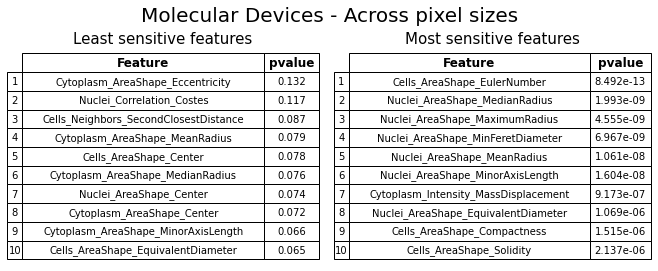

In [4]:
df = pd.read_csv("../../../data/MolDev_all_plate_comparison.csv")
t_b_feats = top_bottom_features(df)
fig, ax = plt.subplots(1, 2, figsize=(9.3, 3.8))
plot = plot_tables(t_b_feats.iloc[:,[0,1,2]], t_b_feats.iloc[:, [0,3,4]], "Molecular Devices - Across pixel sizes", fig, ax)
plot.savefig("(S9A1)-moldev-across-pixel-size.png", dpi=300)

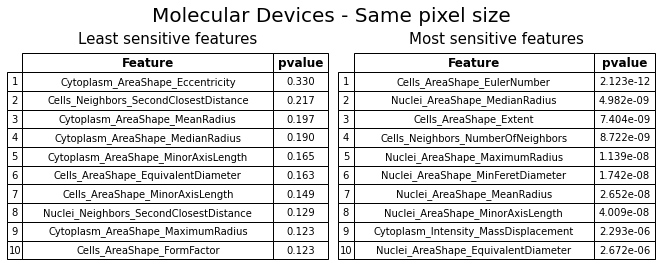

In [5]:
df = pd.read_csv("../../../data/MolDev_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
t_b_feats = top_bottom_features(df)
fig, ax = plt.subplots(1, 2, figsize=(9.3, 3.8))
plot = plot_tables(t_b_feats.iloc[:,[0,1,2]], t_b_feats.iloc[:, [0,3,4]], "Molecular Devices - Same pixel size", fig, ax)
plot.savefig("(S9A2)-moldev-same-pixel-size.png", dpi=300)

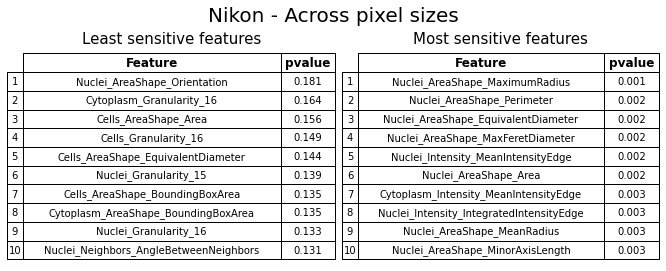

In [6]:
df = pd.read_csv("../../../data/Nikon_all_plate_comparison.csv")
t_b_feats = top_bottom_features(df)
fig, ax = plt.subplots(1, 2, figsize=(9.3, 3.8))
plot = plot_tables(t_b_feats.iloc[:,[0,1,2]], t_b_feats.iloc[:, [0,3,4]], "Nikon - Across pixel sizes", fig, ax)
plot.savefig("(S9B1)-nikon-across-pixel-size.png", dpi=300)

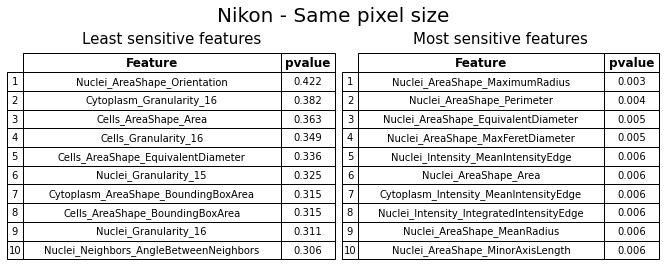

In [7]:
df = pd.read_csv("../../../data/nikon_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
t_b_feats = top_bottom_features(df)
fig, ax = plt.subplots(1, 2, figsize=(9.3, 3.8))
plot = plot_tables(t_b_feats.iloc[:,[0,1,2]], t_b_feats.iloc[:, [0,3,4]], "Nikon - Same pixel size", fig, ax)
plot.savefig("(S9B2)-nikon-same-pixel-size.png", dpi=300)

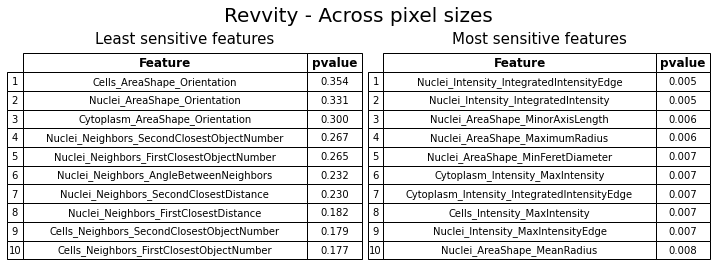

In [13]:
df = pd.read_csv("../../../data/PE_all_plate_comparison.csv")
t_b_feats = top_bottom_features(df)
fig, ax = plt.subplots(1, 2, figsize=(10, 3.8))
plot = plot_tables(t_b_feats.iloc[:,[0,1,2]], t_b_feats.iloc[:, [0,3,4]], "Revvity - Across pixel sizes", fig, ax)
plot.savefig("(S9C1)-pe-across-pixel-size.png", dpi=300)

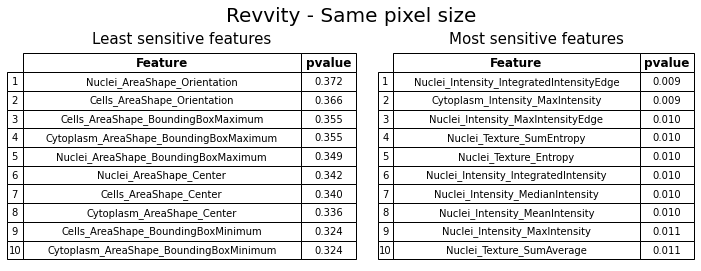

In [14]:
df = pd.read_csv("../../../data/PE_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
t_b_feats = top_bottom_features(df)
fig, ax = plt.subplots(1, 2, figsize=(10, 3.8))
plot = plot_tables(t_b_feats.iloc[:,[0,1,2]], t_b_feats.iloc[:, [0,3,4]], "Revvity - Same pixel size", fig, ax)
plot.savefig("(S9C2)-pe-same-pixel-size.png", dpi=300)

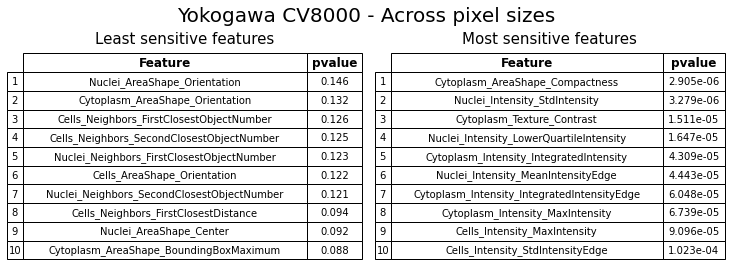

In [10]:
df = pd.read_csv("../../../data/yokogawa_us_all_plate_comparison.csv")
t_b_feats = top_bottom_features(df)
fig, ax = plt.subplots(1, 2, figsize=(10.3, 3.8))
plot = plot_tables(t_b_feats.iloc[:,[0,1,2]], t_b_feats.iloc[:, [0,3,4]], "Yokogawa CV8000 - Across pixel sizes", fig, ax)
plot.savefig("(S9D1)-yokogawa_us-across-pixel-size.png", dpi=300)

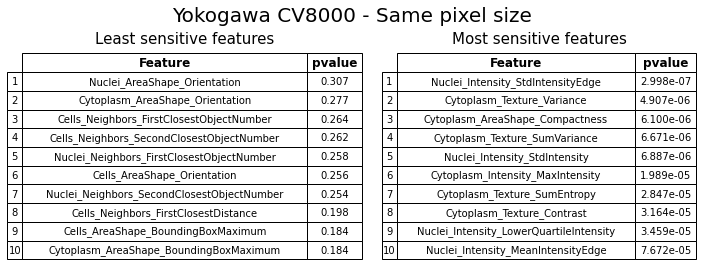

In [11]:
df = pd.read_csv("../../../data/yokogawa_us_all_plate_comparison_exclude_different_mag_binning_comparison.csv")
t_b_feats = top_bottom_features(df)
fig, ax = plt.subplots(1, 2, figsize=(10, 3.8))
plot = plot_tables(t_b_feats.iloc[:,[0,1,2]], t_b_feats.iloc[:, [0,3,4]], "Yokogawa CV8000 - Same pixel size", fig, ax)
plot.savefig("(S9D2)-yokogawa_us-same-pixel-size.png", dpi=300)

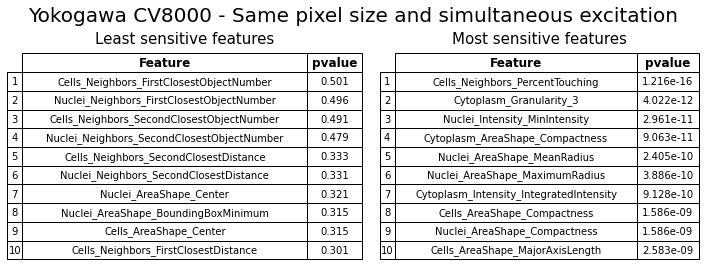

In [12]:
df = pd.read_csv("../../../data/Yokogawa_US_all_plate_comparison_exclude_different_mag_binning_comparison_exclude_simultaneous_excitation.csv")
t_b_feats = top_bottom_features(df)
fig, ax = plt.subplots(1, 2, figsize=(10, 3.8))
plot = plot_tables(t_b_feats.iloc[:,[0,1,2]], t_b_feats.iloc[:, [0,3,4]], "Yokogawa CV8000 - Same pixel size and simultaneous excitation", fig, ax)
plot.savefig("(S9D3)-yokogawa_us-same-pixel-size-same-simultenaous excitation.png", dpi=300)